In [195]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as snc
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb


In [157]:
df=pd.read_csv('Red.csv')
df.shape

(8666, 8)

In [158]:
df.sample(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
6966,Médoc 2014,France,Médoc,Château du Perier,3.4,64,13.76,2014
3324,Aromes de Pavie Saint-Émilion Grand Cru 2005,France,Saint-Émilion Grand Cru,Château Pavie,4.1,273,428.65,2005
4808,Schioppettino 2012,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,3.5,38,13.90,2012
7096,Haideboden Frauenkirchner 2016,Austria,Burgenland,Umathum,3.9,66,25.50,2016
3855,Barbera d'Asti Lavignone 2018,Italy,Barbera d'Asti,Pico Maccario,3.8,306,9.95,2018


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB


In [160]:
df.describe()

,Rating,NumberOfRatings,Price
count,8666.000000,8666.000000,8666.000000
mean,3.890342,415.287445,39.145065
std,0.308548,899.726373,84.936307
min,2.500000,25.000000,3.550000
25%,3.700000,66.000000,10.680000
50%,3.900000,157.000000,18.200000
75%,4.100000,401.000000,38.142500
max,4.800000,20293.000000,3410.790000


In [161]:
df.isnull().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               0
dtype: int64

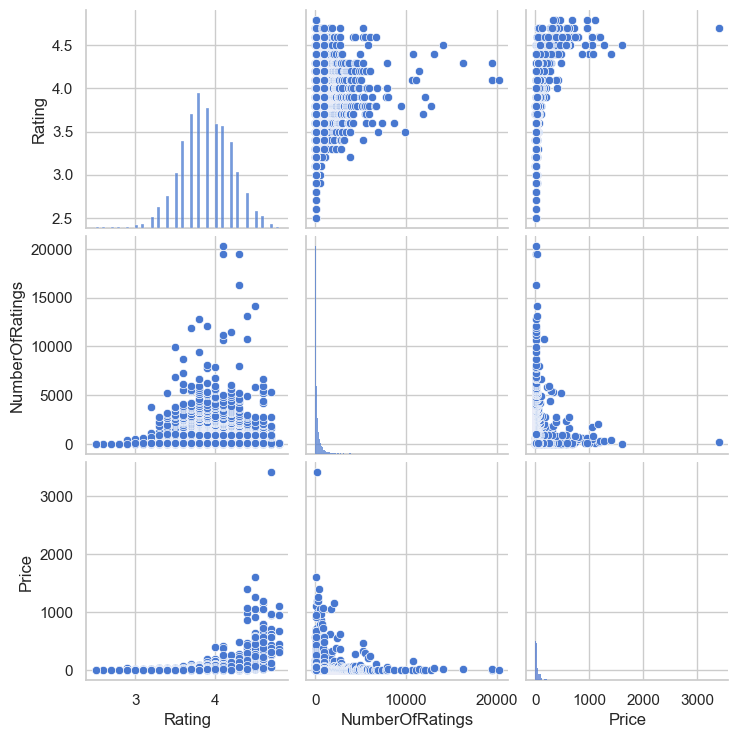

In [162]:
numerical_col=['Rating','NumberOfRatings','Price','Year']
snc.pairplot(df[numerical_col])
plt.show()

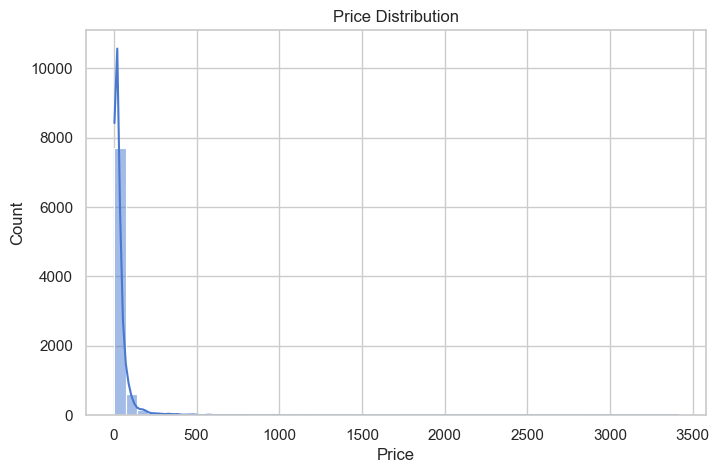

In [163]:
plt.figure(figsize=(8,5))
snc.histplot(df['Price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

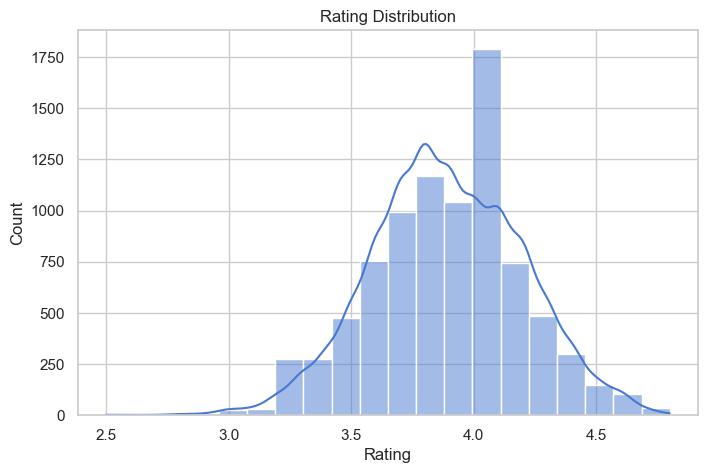

In [164]:
plt.figure(figsize=(8,5))
snc.histplot(df['Rating'], bins=20, kde=True)
plt.title("Rating Distribution")
plt.show()

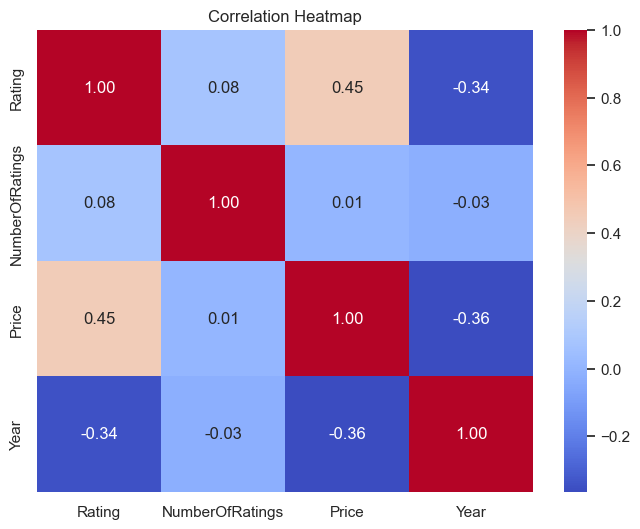

In [165]:
for col in numerical_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')

corr = df[numerical_col].corr()

plt.figure(figsize=(8,6))
snc.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


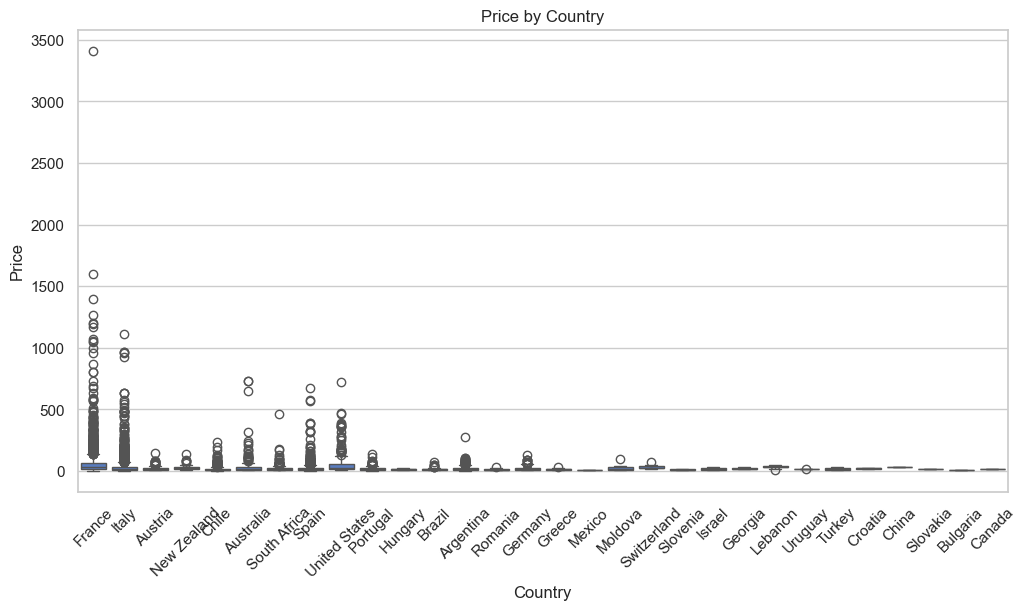

In [166]:
plt.figure(figsize=(12,6))
snc.boxplot(x='Country', y='Price', data=df)
plt.xticks(rotation=45)
plt.title("Price by Country")
plt.show()


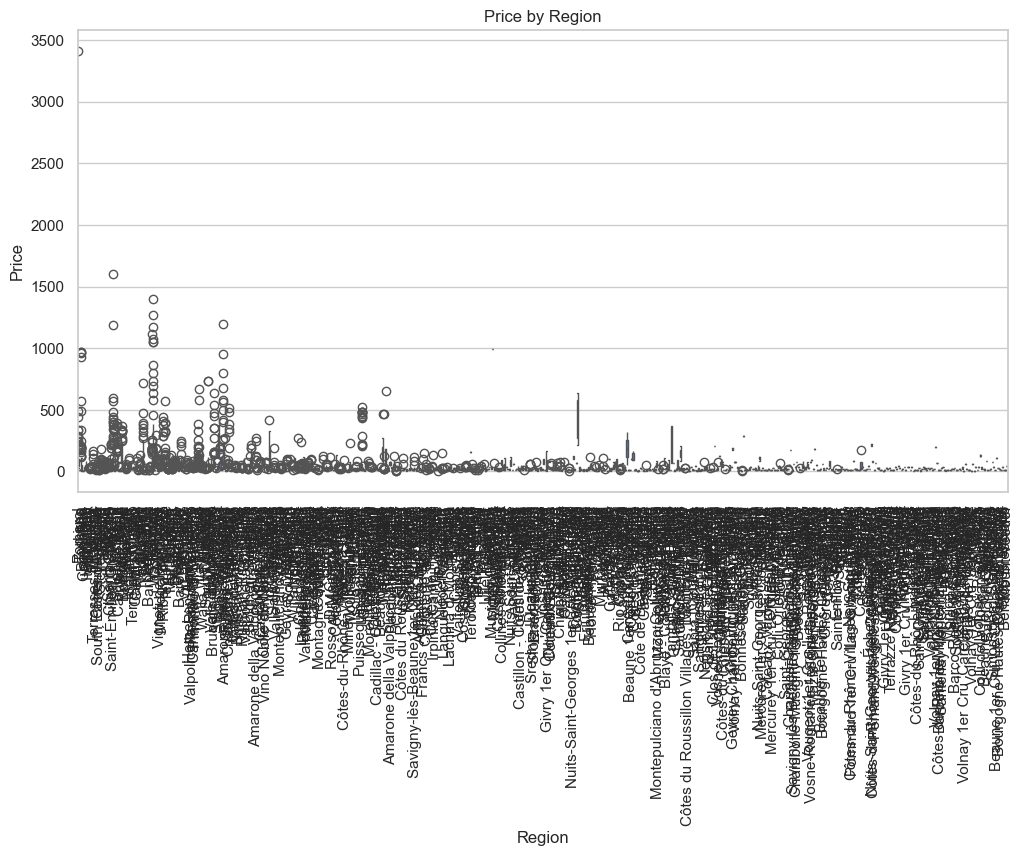

In [167]:
plt.figure(figsize=(12,6))
snc.boxplot(x='Region', y='Price', data=df)
plt.xticks(rotation=90)
plt.title("Price by Region")
plt.show()


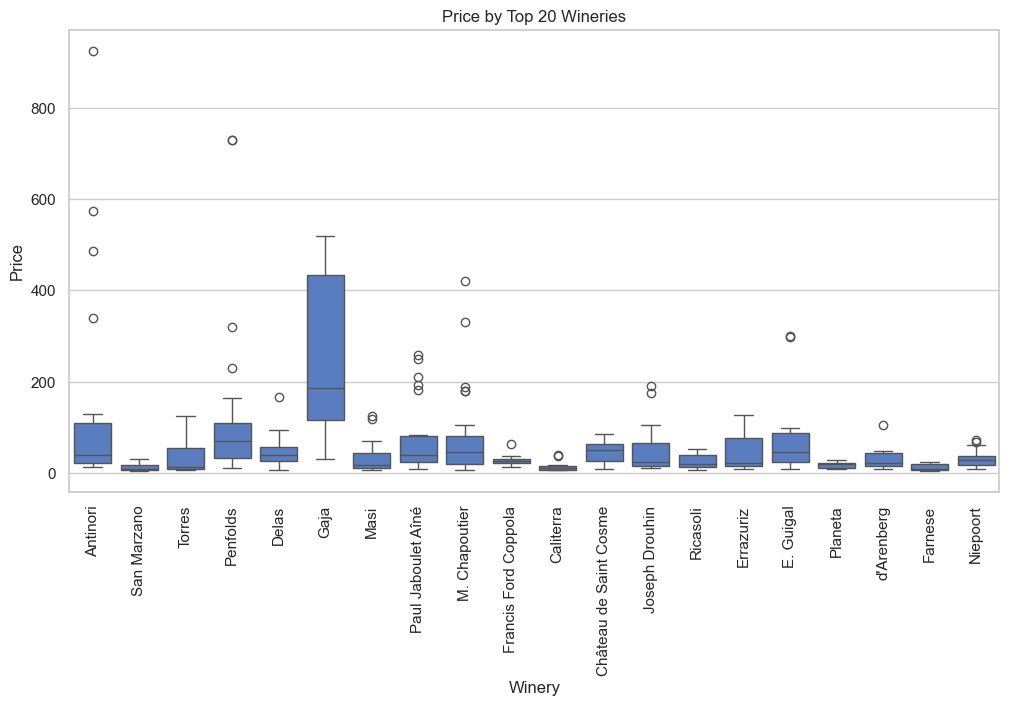

In [168]:
plt.figure(figsize=(12,6))
top_wineries = df['Winery'].value_counts().nlargest(20).index
snc.boxplot(x='Winery', y='Price', data=df[df['Winery'].isin(top_wineries)])
plt.xticks(rotation=90)#Rotates winery names vertically so they don’t overlap and are readable.
plt.title("Price by Top 20 Wineries")
plt.show()

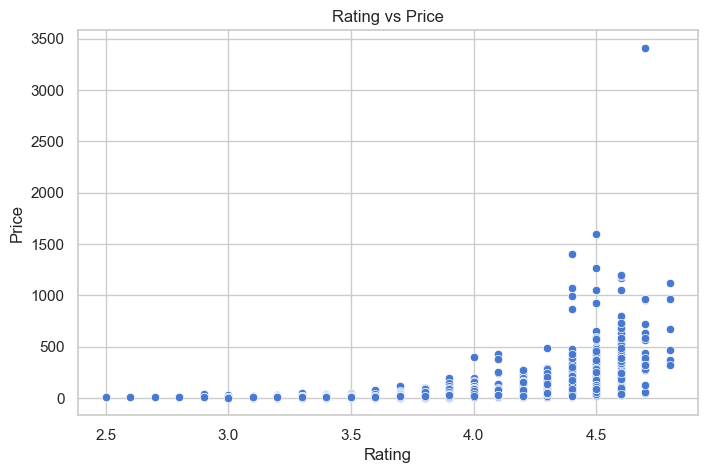

In [169]:
plt.figure(figsize=(8,5))
snc.scatterplot(x='Rating', y='Price', data=df)
plt.title("Rating vs Price")
plt.show()


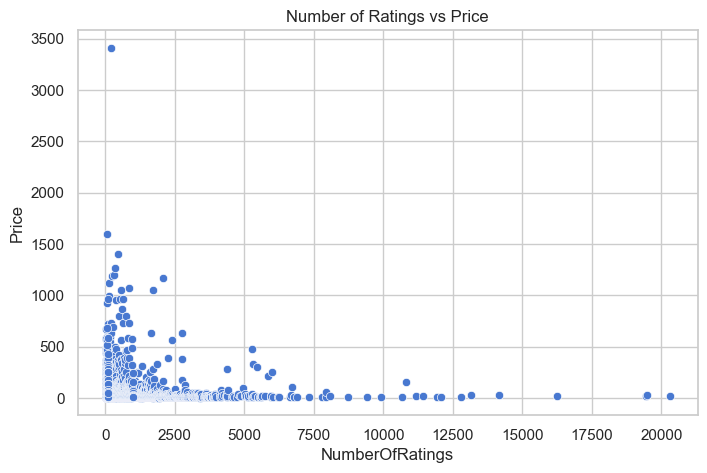

In [170]:
plt.figure(figsize=(8,5))
snc.scatterplot(x='NumberOfRatings', y='Price', data=df)
plt.title("Number of Ratings vs Price")
plt.show()


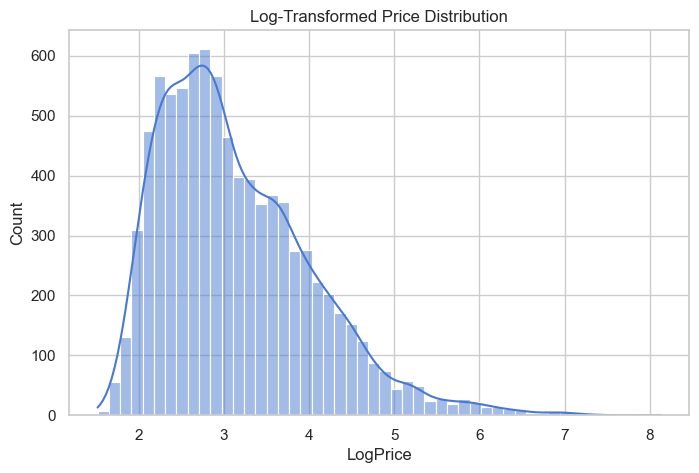

In [171]:
import numpy as np

df['LogPrice'] = np.log1p(df['Price'])

plt.figure(figsize=(8,5))
snc.histplot(df['LogPrice'], bins=50, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()


In [172]:
encoder=OneHotEncoder()

categorical_cols=['Country','Region','Winery','Year']

df=pd.get_dummies(df,columns=categorical_cols,drop_first=True,dtype=int)
df

,Name,Rating,NumberOfRatings,Price,LogPrice,Country_Australia,Country_Austria,Country_Brazil,Country_Bulgaria,Country_Canada,...,Year_2010.0,Year_2011.0,Year_2012.0,Year_2013.0,Year_2014.0,Year_2015.0,Year_2016.0,Year_2017.0,Year_2018.0,Year_2019.0
0,Pomerol 2011,4.2,100,95.00,4.564348,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Lirac 2017,4.3,100,15.50,2.803360,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Erta e China Rosso di Toscana 2015,3.9,100,7.45,2.134166,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Bardolino 2019,3.5,100,8.72,2.274186,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Ried Scheibner Pinot Noir 2016,3.9,100,29.15,3.406185,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,6th Sense Syrah 2016,3.8,994,16.47,2.860485,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8662,Botrosecco Maremma Toscana 2016,4.0,995,20.09,3.048799,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8663,Haut-Médoc 2010,3.7,996,23.95,3.216874,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8664,Shiraz 2019,3.5,998,6.21,1.975469,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [184]:
x=df.drop(['Price','Name'],axis=1)
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Using RandomForestRegressor

In [200]:
rfmodel=RandomForestRegressor(n_estimators=100,random_state=42)

rfmodel.fit(x_train,y_train)

y_pred=rfmodel.predict(x_test)

mse=mean_squared_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)

print("MSE:", mse)

print("R2 Score:", r2)

MSE: 16.148636913408293
R2 Score: 0.9962285563565102


Using LinearRegression

In [201]:
lrmodel=LinearRegression()

lrmodel.fit(x_train,y_train)

y_pred=lrmodel.predict(x_test)

mse=mean_squared_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)

print("MSE:", mse)

print("R2 Score:", r2)

MSE: 1508.0328456852187
R2 Score: 0.6478055132126372


Using XGBRegressor

In [202]:
xgbmodel = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

xgbmodel.fit(x_train, y_train)

y_pred_xgb = xgbmodel.predict(x_test)

mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor - MSE:", mse)
print("XGBoost Regressor - R2:", r2)


XGBoost Regressor - MSE: 124.65040572121765
XGBoost Regressor - R2: 0.9708884419882293


Mean_squared_error,r2_score of RandomForestRegressor are better than the linear regression and GBRegressor so use RandomForestRegressor 

MSE and R2score of xgboost and randomforestRegressor are almost equal you can predict using them for new input

Prediction for new Input

In [204]:
new_wine = {
    'Rating': 4.2,
    'NumberOfRatings': 500,
    'Country_Italy': 1,
    'Region_Chianti Classico': 1,
    'Winery_Fèlsina': 1,
    'Year_2017': 1
}

new_wine_df = pd.DataFrame([new_wine])

missing_cols = set(x_train.columns) - set(new_wine_df.columns)
for col in missing_cols:
    new_wine_df[col] = 0

new_wine_df = new_wine_df[x_train.columns]
pred_rf=rfmodel.predict(new_wine_df)[0]
pred_xgb = xgbmodel.predict(new_wine_df)[0]

print("Predicted Price (RandomForestRegression):", pred_rf)
print("Predicted Price (XGBoost):", pred_xgb)


C:\Users\gulab\AppData\Local\Temp\ipykernel_8824\380634874.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_wine_df[col] = 0
C:\Users\gulab\AppData\Local\Temp\ipykernel_8824\380634874.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_wine_df[col] = 0
C:\Users\gulab\AppData\Local\Temp\ipykernel_8824\380634874.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

Predicted Price (RandomForestRegression): 3.8292000000000024
Predicted Price (XGBoost): 4.961916
